In [4]:
import numpy as np
import pandas as pd
from qiskit.quantum_info import SparsePauliOp
from susy_qm import calculate_wz_hamiltonian

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import os

In [5]:
# Parameters
N = 3
a = 1.0
c = -0.2
#potential = 'quadratic'
potential = "linear"
boundary_condition = 'dirichlet'
#boundary_condition = 'periodic'

In [6]:
cutoffs = [4]
for cutoff in cutoffs:

    print(cutoff, N, a, potential, boundary_condition, c)
    H = calculate_wz_hamiltonian(cutoff, N, a, potential, boundary_condition, c)
    hamiltonian = SparsePauliOp.from_operator(H)
    num_qubits = hamiltonian.num_qubits
        
    eigenvalues, eigenvectors = np.linalg.eig(H)
    min_eigenvalue = min(eigenvalues.real)
    min_index = np.argmin(eigenvalues)
    min_eigenvalue = eigenvalues[min_index]
    min_eigenvector = np.asarray(eigenvectors[:, min_index])

    active_indices = [i for i, val in enumerate(min_eigenvector) if abs(val) > 1e-8]
    states = [format(i, f'0{num_qubits}b') for i in active_indices]
    print("Active basis states:")
    for s in states:
        print(s)

    print('##########################################')


4 3 1.0 linear dirichlet -0.2
Active basis states:
001000000
001000010
001001000
001001010
001010001
001010011
001011001
001011011
001100000
001100010
001101000
001101010
001110001
001110011
001111001
001111011
010000000
010000010
010001000
010001010
010010001
010010011
010011001
010011011
010100000
010100010
010101000
010101010
010110001
010110011
010111001
010111011
100000000
100000010
100001000
100001010
100010001
100010011
100011001
100011011
100100000
100100010
100101000
100101010
100110001
100110011
100111001
100111011
##########################################


In [7]:
num_qubits

9

In [8]:
min_eigenvalue

np.complex128(0.00011746368064371616+0j)

4 3 1.0 linear dirichlet -0.8


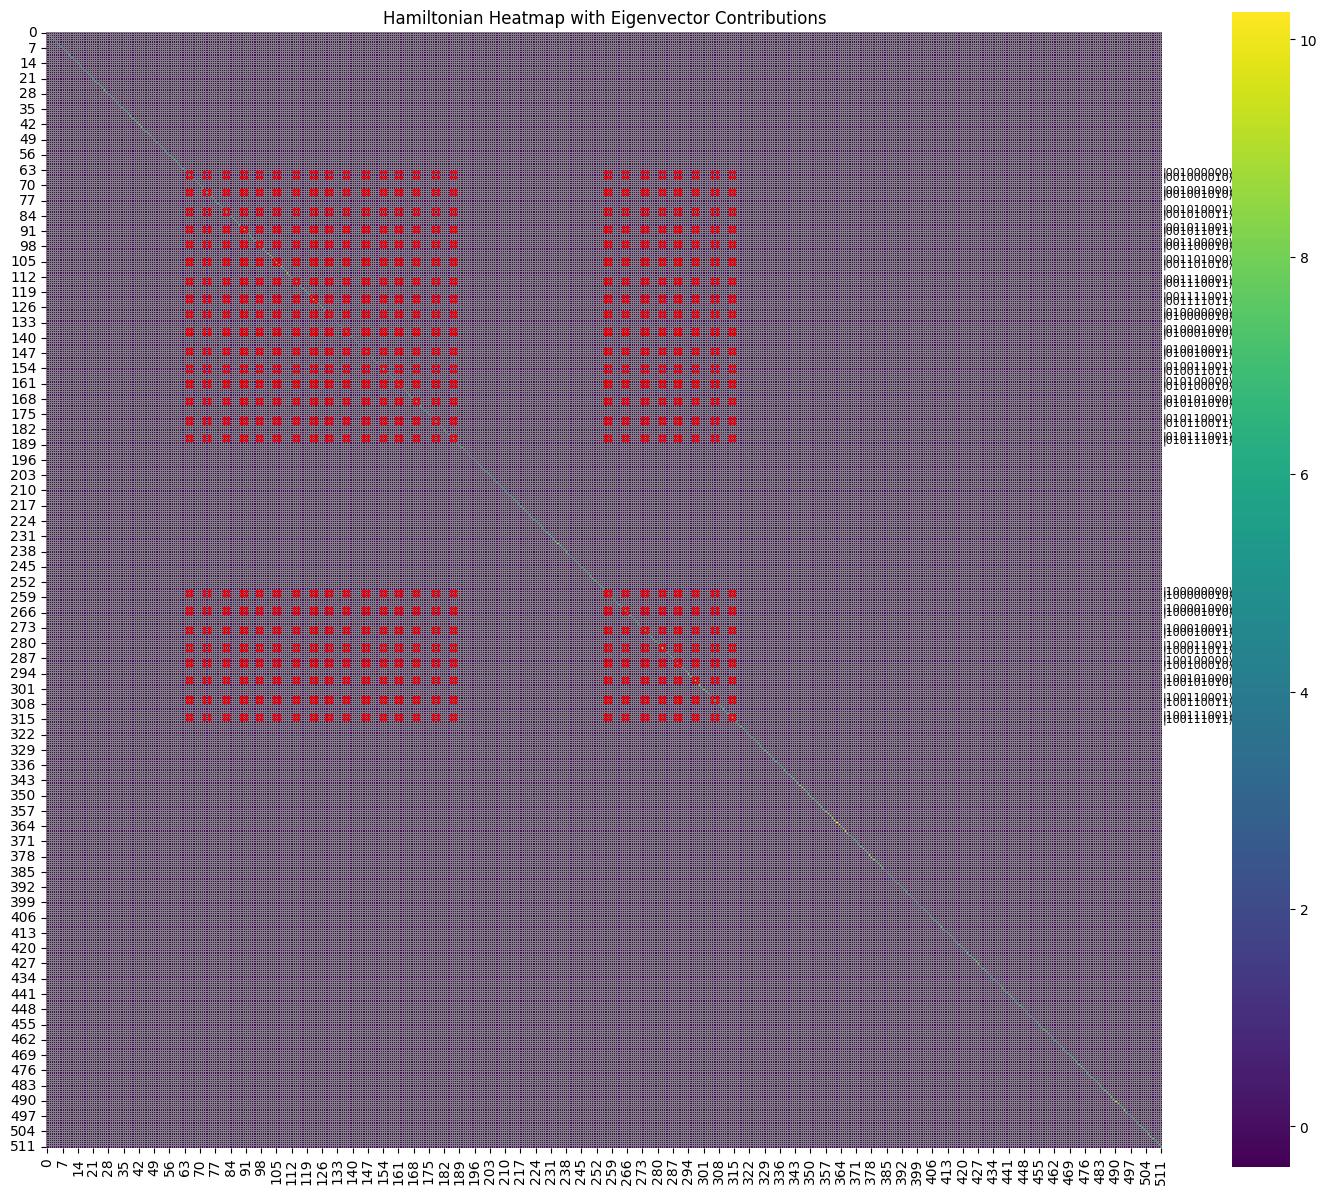

In [9]:
# Parameters
N = 3
a = 1.0
c = -0.8
#potential = 'quadratic'
potential = "linear"
boundary_condition = 'dirichlet'
#boundary_condition = 'periodic'

cutoffs = [4]
for cutoff in cutoffs:

    print(cutoff, N, a, potential, boundary_condition, c)
    H = calculate_wz_hamiltonian(cutoff, N, a, potential, boundary_condition, c)
    hamiltonian = SparsePauliOp.from_operator(H)
    num_qubits = hamiltonian.num_qubits
        
    eigenvalues, eigenvectors = np.linalg.eig(H)
    min_index = np.argmin(eigenvalues)
    min_eigenvector = np.asarray(eigenvectors[:, min_index])

    df = pd.DataFrame(H.real)
    active_indices = [i for i, val in enumerate(min_eigenvector) if abs(val) > 1e-8]

    plt.figure(figsize=(18, 15))
    ax = sns.heatmap(df, cmap='viridis', cbar=True, annot=False, linewidths=0.5, linecolor='gray', square=True)

    for i in active_indices:
        for j in active_indices:
            rect = patches.Rectangle(
                (j, i), 1, 1, fill=False, edgecolor='red', linewidth=1
            )
            ax.add_patch(rect)

    eigvec = min_eigenvector.real.flatten()
    #for i in range(len(eigvec)):
    for i in active_indices:
        basis = format(i, f'0{num_qubits}b')
        label = f"|{basis}⟩"#: {eigvec[i].real:.2f}"
        ax.text(df.shape[1] + 0.2, i + 0.5, label, va='center', ha='left', color='black', fontsize=8)

    plt.title("Hamiltonian Heatmap with Eigenvector Contributions")
    #plt.show()

    if potential == 'quadratic':
        folder = 'C' + str(abs(c)) + '/' + 'N'+ str(N)
    else:
        folder = 'N'+ str(N)

    save_path = os.path.join(r"C:\Users\Johnk\Documents\PhD\Quantum Computing Code\Quantum-Computing\SUSY\Wess-Zumino\EigenvectorChecks\Heatmaps\BasisStates", boundary_condition, potential, folder)
    os.makedirs(save_path, exist_ok=True)
    plt.savefig(save_path + f"\\heatmap_{cutoff}")


In [50]:
def highlight_nonzero(val):
    return 'background-color: green' if val != 0 else ''

df = pd.DataFrame(H.real)
df = df.style.map(highlight_nonzero).format(precision=1)
#df


In [52]:
active_indices = [i for i, val in enumerate(min_eigenvector) if abs(val) > 1e-8]
df = pd.DataFrame(H.real)

def highlight_active_contribution(val, row_idx, col_idx):
    if row_idx in active_indices and col_idx in active_indices:
        return 'background-color: green'
    return ''

styled_df = df.style.apply(
    lambda data: np.vectorize(highlight_active_contribution)(data, *np.indices(data.shape)),
    axis=None
).format("{:.1f}")

styled_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,2.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,2.1,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
min_eigenvector.real.flatten()

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.97324899,
        0.        ,  0.        ,  0.        , -0.22975292,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ])